# Importing Libraries and Data collection

In [1]:
import pandas as pd

In [2]:
df_org=pd.read_csv('Coursera.csv')

In [3]:
df_org.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course youll learn how to effectively ...,Data Analysis select (sql) database manageme...


# Exploratory Data Analysis

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [5]:
df_org.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [6]:
#data set have no misssing values

# Creating the copy of the dataset

We create a copy of the data set so that we can use columns useful for recommending the similar courses and and dropping the columns that are not very useful for recommending courses. we keep the original dataset because while recommending the courses we need to print all the columns as our output so that user can see all the information related to recommended courses.

In [7]:
df=df_org.copy()

In [8]:
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course youll learn how to effectively ...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"Give me liberty, or give me death: Remembering...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,Megatrends heavily influence todays organisati...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


# Dropping columns that are not necessary for NLP model training

In [9]:
df.drop(['University','Difficulty Level','Course Rating','Course URL','Course Description'], axis=1,inplace=True)

In [10]:
df.head()

,Course Name,Skills
0,Write A Feature Length Screenplay For Film Or ...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,chemistry physics Solar Energy film lambda...
3,Finance for Managers,accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Data Analysis select (sql) database manageme...


# Declaring TF-IDF and removing stop words

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
df['cleaned'] = df['Skills'].fillna('')

In [12]:
df.head()

,Course Name,Skills,cleaned
0,Write A Feature Length Screenplay For Film Or ...,Drama Comedy peering screenwriting film D...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Finance business plan persona (user experien...,Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,chemistry physics Solar Energy film lambda...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,accounts receivable dupont analysis analysis...,accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Data Analysis select (sql) database manageme...,Data Analysis select (sql) database manageme...


# Making sparse matrix of the dataset

In [13]:
# Fitting the TF-IDF on the 'cleaned' text
tfv_matrix = tfv.fit_transform(df['cleaned'])

In [14]:
tfv_matrix

<3522x7499 sparse matrix of type '<class 'numpy.float64'>'
	with 105262 stored elements in Compressed Sparse Row format>

In [15]:
tfv_matrix.shape

(3522, 7499)

In [16]:
tm=tfv_matrix

In [17]:
import scipy.sparse

In [18]:
tfidfcheck=pd.DataFrame.sparse.from_spmatrix(tm)

In [19]:
tfidfcheck

,0,1,2,3,4,5,6,7,8,9,...,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.238635,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168583,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# making sigmoid kernel

We make a sigmoid kernel which stores the similarity score between each each row of cleaned column with every other rows these similarity scores will tell us how much the given row is related to other rows in the dataset and by this we can find similar courses for recommendations. The values of sigmoid kernel is between 0 and 1 since it uses sigmoid function.

In [20]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [21]:
sig.shape

(3522, 3522)

In [22]:
sig

array([[0.76165015, 0.76159416, 0.761596  , ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76165015, 0.76159416, ..., 0.76159879, 0.76159416,
        0.76159448],
       [0.761596  , 0.76159416, 0.76165015, ..., 0.76159416, 0.76160211,
        0.76159431],
       ...,
       [0.76159416, 0.76159879, 0.76159416, ..., 0.76165015, 0.76159416,
        0.76159494],
       [0.76159416, 0.76159416, 0.76160211, ..., 0.76159416, 0.76165015,
        0.76159431],
       [0.76159416, 0.76159448, 0.76159431, ..., 0.76159494, 0.76159431,
        0.76165015]])

In [23]:
sig[0]

array([0.76165015, 0.76159416, 0.761596  , ..., 0.76159416, 0.76159416,
       0.76159416])

In [24]:
# Reverse mapping of indices and titles
indices = pd.Series(df.index, index=df['Course Name']).drop_duplicates()

In [25]:
indices

Course Name
Write A Feature Length Screenplay For Film Or Television                 0
Business Strategy: Business Model Canvas Analysis with Miro              1
Silicon Thin Film Solar Cells                                            2
Finance for Managers                                                     3
Retrieve Data using Single-Table SQL Queries                             4
                                                                      ... 
Capstone: Retrieving, Processing, and Visualizing Data with Python    3517
Patrick Henry: Forgotten Founder                                      3518
Business intelligence and data analytics: Generate insights           3519
Rigid Body Dynamics                                                   3520
Architecting with Google Kubernetes Engine: Production                3521
Length: 3522, dtype: int64

In [26]:
indices['Write A Feature Length Screenplay For Film Or Television']

0

In [27]:
sig[0]

array([0.76165015, 0.76159416, 0.761596  , ..., 0.76159416, 0.76159416,
       0.76159416])

In [28]:
list(enumerate(sig[indices['Write A Feature Length Screenplay For Film Or Television']]))[0:25]
#seeing 25 elements of the list

[(0, 0.7616501543143597),
 (1, 0.7615941559557649),
 (2, 0.7615959985478333),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615959721847939),
 (7, 0.7615941559557649),
 (8, 0.7615965276828943),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7616000174979918),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649)]

In [29]:
sorted(list(enumerate(sig[indices['Write A Feature Length Screenplay For Film Or Television']])), key=lambda x: x[1], reverse=True)[0:25]
#seeing 25 elements of the list

[(0, 0.7616501543143597),
 (1451, 0.7616211598384217),
 (3462, 0.76161949817074),
 (1481, 0.7616191862008939),
 (2424, 0.7616172565927477),
 (3005, 0.7616167887484515),
 (2011, 0.761615390906486),
 (1213, 0.7616153234413898),
 (535, 0.761615321659031),
 (339, 0.7616152010462668),
 (2536, 0.7616148552189045),
 (1629, 0.7616146544846754),
 (1655, 0.7616144107848734),
 (3255, 0.761612691822956),
 (1604, 0.7616120955395769),
 (1664, 0.7616115058424158),
 (150, 0.7616114696589187),
 (149, 0.7616109344121397),
 (2445, 0.7616108788319054),
 (2698, 0.7616108467759751),
 (3481, 0.7616107421294825),
 (1470, 0.7616106639002127),
 (1823, 0.7616104565237118),
 (545, 0.7616103898847859),
 (2551, 0.7616102116397325)]

# Defining function that returns the recommendations

In [30]:
def give_rec(title, sig=sig):
    # Get the index corresponding to given course
    idx = indices[title]

    # Get the pairwsie similarity scores with given course with every available course in the data set
    sig_scores = list(enumerate(sig[idx]))

    # Sort the recommended courses
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar courses
    sig_scores = sig_scores[1:11]

    # get courses indices for top 10 recommended courses
    course_indices = [i[0] for i in sig_scores]

    # Top 10 most similar courses
    return df_org.iloc[course_indices]

# finding a course using keywords

we find list of similar courses using keywords so that user can find similar courses even without knowing name of the courses available in the data set. we use get_close_matches function to get the closest match of the keyword from difflib library then we take the most closest match and then recommend courses using that course. 

In [31]:
import difflib

In [32]:
namelist=df['Course Name'].tolist()

In [33]:
namelist[0:25]
#seeing 25 elements of the list

['Write A Feature Length Screenplay For Film Or Television',
 'Business Strategy: Business Model Canvas Analysis with Miro',
 'Silicon Thin Film Solar Cells',
 'Finance for Managers',
 'Retrieve Data using Single-Table SQL Queries',
 'Building Test Automation Framework using Selenium and TestNG',
 'Doing Business in China Capstone',
 'Programming Languages, Part A',
 'The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process',
 'Business Russian Communication. Part 3',
 'Agile Projects:  Developing Tasks with Taiga',
 'Esports Management Capstone Project',
 'Hacking and Patching',
 'Business Statistics and Analysis Capstone',
 'Grab Data Fast with Vertical and Horizontal LOOKUP',
 'Global Health: An Interdisciplinary Overview',
 'Python Programming Essentials',
 'Creating Dashboards and Storytelling with Tableau',
 'Parallel programming',
 'Recommendation Systems with TensorFlow on GCP',
 'The Changing Arctic',
 'COVID-19 - A clinical update',
 'How 

In [34]:
word='voices of social change'

In [35]:
simlist=difflib.get_close_matches(word, namelist)
simlist

['Voices of Social Change']

# Handling errors and no output senarioes

In [36]:
try: 
        findf=give_rec(simlist[0])
        findf=findf.reset_index(drop=True)
except:
        findf = pd.DataFrame()

In [37]:
findf

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Career Options: Exploring a New Career,University System of Georgia,Intermediate,3.8,https://www.coursera.org/learn/career-exploration,This course is for you if you are interested i...,career college salary Planning relative ch...
1,Think Again II: How to Reason Deductively,Duke University,Intermediate,4.3,https://www.coursera.org/learn/deductive-reaso...,Deductive arguments are supposed to be valid i...,personal development thought Critical Thinki...
2,Thrive in Trying Times Teach-Out,University of Michigan,Beginner,4.3,https://www.coursera.org/learn/thrive-in-tryin...,"In times of crisis, like the coronavirus and C...",experience bodymind thriving Average stres...
3,Presentation skills: Designing Presentation Sl...,National Research Tomsk State University,Advanced,4.6,https://www.coursera.org/learn/slides,Powerpoint slides are like children: no matter...,relative change and difference presentation ...
4,Finding Purpose and Meaning In Life: Living fo...,University of Michigan,Beginner,4.6,https://www.coursera.org/learn/finding-purpose...,Welcome to Finding Purpose and Meaning in Life...,relative change and difference happiness mea...
5,Achieving Your Optimal Performance,University of California San Diego,Advanced,4.6,https://www.coursera.org/learn/achieving-your-...,"In a very competitive workplace, outstanding p...",behavior performance reflective learning pr...
6,Science of Training Young Athletes Part 2,University of Florida,Intermediate,5,https://www.coursera.org/learn/science-of-trai...,In this course you will learn how to design th...,sports Training heart rate performance ord...
7,Tinkering Fundamentals: Circuits,Exploratorium,Beginner,4.7,https://www.coursera.org/learn/tinkering-circuits,The Tinkering Fundamentals course will offer e...,phenomenon Carpentry Strategy interest fac...
8,Engaging in Persuasive and Credible Communication,National University of Singapore,Advanced,4.5,https://www.coursera.org/learn/persuasive-comm...,"In ""Engaging in Persuasive and Credible Commun...",social work persuasive writing persuasion W...
9,The Arts and Science of Relationships: Underst...,University of Toronto,Conversant,4.3,https://www.coursera.org/learn/human-needs,This course provides an introduction to: 1. Ba...,counseling Leadership and Management sex pe...


In [38]:
if findf.empty:
        ms='Sorry! we did not find any matching courses, Try adding more keywords in your search.'
        ht=' '
else:
        ht='done'
        ms='Here are some recommendations :'

In [39]:
ms

'Here are some recommendations :'

In [40]:
ht

'done'

In [12]:
# Step 1: Import the necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Step 2: Generate a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create an instance of the SVC classifier with the sigmoid kernel
clf = SVC(kernel='sigmoid', random_state=42)

# Step 5: Fit the classifier to the training data
clf.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = clf.predict(X_test)

# Step 7: Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 8: Print the evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score:", f1)


Accuracy: 1.0
AUC: 1.0
F1 Score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


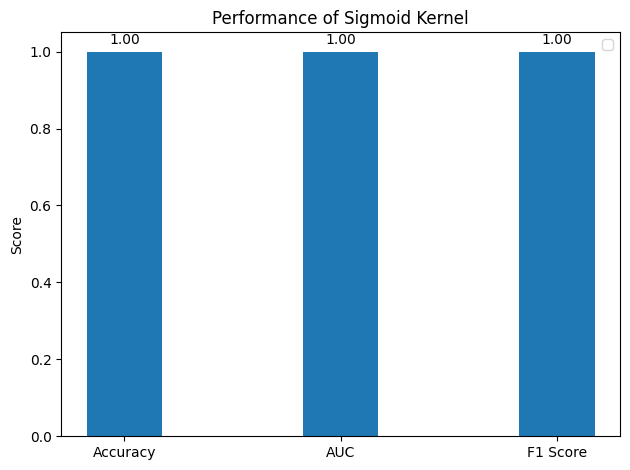

In [18]:

# Step 1: Import the necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
# Step 2: Generate a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create an instance of the SVC classifier with the sigmoid kernel
clf = SVC(kernel='sigmoid', random_state=42)

# Step 5: Fit the classifier to the training data
clf.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = clf.predict(X_test)

# Step 7: Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 8: Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 9: Create a list of evaluation metric names and corresponding scores
metrics = ['Accuracy', 'AUC', 'F1 Score']
scores = [accuracy, auc, f1]

# Plot the evaluation metrics
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, scores, width)

# Add labels, title, and gridlines
ax.set_ylabel('Score')
ax.set_title('Performance of Sigmoid Kernel')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add the scores as text labels on top of the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
